In [1]:
#%%
from vnpy.app.cta_strategy.backtesting import BacktestingEngine, OptimizationSetting
from vnpy.app.cta_strategy.strategies.tsmyo_ppdc_prototype_strategy import (
    TSMyoPPDCPROTOTYPEStrategy
)
from datetime import datetime

2020-03-17 23:52:09.121238	开始加载历史数据
2020-03-17 23:52:09.122231	加载进度： [1%]
2020-03-17 23:52:09.122790	加载进度： [2%]
2020-03-17 23:52:09.123232	加载进度： [2%]
2020-03-17 23:52:09.266878	加载进度： [3%]
2020-03-17 23:52:09.537123	加载进度： [4%]
2020-03-17 23:52:09.858922	加载进度： [5%]
2020-03-17 23:52:10.181305	加载进度： [6%]
2020-03-17 23:52:10.542138	加载进度： [7%]
2020-03-17 23:52:10.806378	加载进度： [7%]
2020-03-17 23:52:11.056606	加载进度： [8%]
2020-03-17 23:52:11.447962	加载进度： [9%]
2020-03-17 23:52:11.736252	加载进度： [10%]
2020-03-17 23:52:12.118817	加载进度：# [11%]
2020-03-17 23:52:12.366547	加载进度：# [12%]
2020-03-17 23:52:12.684837	加载进度：# [12%]
2020-03-17 23:52:12.960209	加载进度：# [13%]
2020-03-17 23:52:13.352316	加载进度：# [14%]
2020-03-17 23:52:13.659596	加载进度：# [15%]
2020-03-17 23:52:13.951916	加载进度：# [16%]
2020-03-17 23:52:14.385395	加载进度：# [16%]
2020-03-17 23:52:14.690198	加载进度：# [17%]
2020-03-17 23:52:14.924260	加载进度：# [18%]
2020-03-17 23:52:15.343195	加载进度：# [19%]
2020-03-17 23:52:15.662485	加载进度：# [20%]
2020-03-17 23:52:15.954751	

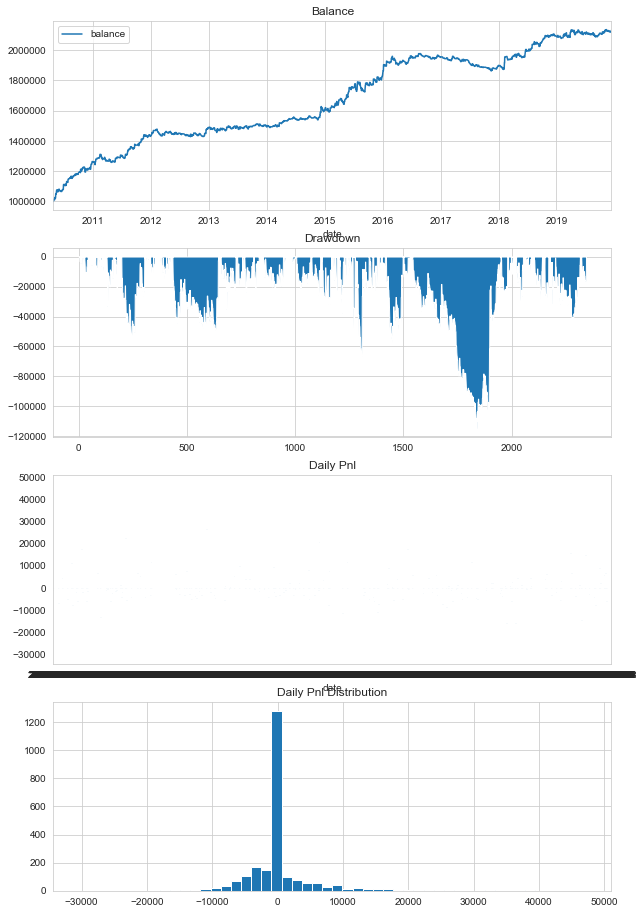

In [2]:
# PPDC 股指IF 滑点3跳
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="IF9999.CFFEX",
    interval="1m",
    start=datetime(2010, 1, 1),
    end=datetime(2020, 1, 1),
    rate=0.23/10000,
    slippage=0.6,
    size=300,
    pricetick=0.2,
    capital=1_000_000,
)
engine.add_strategy(TSMyoPPDCPROTOTYPEStrategy,{'trailing_stop': 0.8, 'atr_stop': 7, 'atr_window': 50})
engine.load_data()
engine.run_backtesting()
engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [6]:
# 全样本优化
setting = OptimizationSetting()
setting.set_target("sharpe_ratio")
setting.add_parameter("trailing_stop", 0.6, 1.0, 0.1)
setting.add_parameter("atr_stop", 4, 9, 1)
setting.add_parameter("atr_window", 30, 60, 5)
#setting.add_parameter("limited_size", 4, 8, 4)

op_re = engine.run_optimization(setting)
engine.calc_pbo(op_re, 10)

2020-03-17 23:04:46.841074	参数：{'trailing_stop': 0.7999999999999999, 'atr_stop': 7, 'atr_window': 50}, 目标：0.6710350954179529
2020-03-17 23:04:46.841074	参数：{'trailing_stop': 0.7999999999999999, 'atr_stop': 7, 'atr_window': 45}, 目标：0.6676767169006481
2020-03-17 23:04:46.841074	参数：{'trailing_stop': 0.7999999999999999, 'atr_stop': 7, 'atr_window': 60}, 目标：0.6606552206463359
2020-03-17 23:04:46.841074	参数：{'trailing_stop': 0.7999999999999999, 'atr_stop': 7, 'atr_window': 40}, 目标：0.6600586801545796
2020-03-17 23:04:46.841074	参数：{'trailing_stop': 0.9999999999999999, 'atr_stop': 6, 'atr_window': 60}, 目标：0.6593400896393687
2020-03-17 23:04:46.841074	参数：{'trailing_stop': 0.7999999999999999, 'atr_stop': 8, 'atr_window': 60}, 目标：0.6585191801078671
2020-03-17 23:04:46.841074	参数：{'trailing_stop': 0.7999999999999999, 'atr_stop': 7, 'atr_window': 55}, 目标：0.6579907021923121
2020-03-17 23:04:46.841074	参数：{'trailing_stop': 0.9999999999999999, 'atr_stop': 6, 'atr_window': 50}, 目标：0.6571047440750564
2020-03-

样本内组合为(0, 1, 2, 3, 4)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.2619047619047619
样本内组合为(0, 1, 2, 3, 5)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.6476190476190476
样本内组合为(0, 1, 2, 3, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.35714285714285715
样本内组合为(0, 1, 2, 3, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.3619047619047619
样本内组合为(0, 1, 2, 3, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.21428571428571427
样本内组合为(0, 1, 2, 3, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.580952380952381
样本内组合为(0, 1, 2, 4, 5)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.6285714285714286
样本内组合为(0, 1, 2, 4, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.14761904761904762
样本内组合为(0, 1, 2, 4, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.580952380952381
样本内组合为(0, 1, 2, 4, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.20952380952380953
样本内组合为(0, 1, 2, 4, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.6
样本内组合为(0, 1, 2, 5, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.09523809523809523
样本内组合为(0, 1, 2, 5, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.6047619047619047
样本内组合为(0, 1

样本内组合为(0, 3, 6, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.3476190476190476
样本内组合为(0, 3, 7, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.34285714285714286
样本内组合为(0, 4, 5, 6, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.18095238095238095
样本内组合为(0, 4, 5, 6, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.4095238095238095
样本内组合为(0, 4, 5, 6, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.24761904761904763
样本内组合为(0, 4, 5, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.08571428571428572
样本内组合为(0, 4, 5, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.4380952380952381
样本内组合为(0, 4, 5, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5714285714285714
样本内组合为(0, 4, 6, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.19047619047619047
样本内组合为(0, 4, 6, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.38571428571428573
样本内组合为(0, 4, 6, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5095238095238095
样本内组合为(0, 4, 7, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.4
样本内组合为(0, 5, 6, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.43333333333333335
样本内组合为(

0.6111111111111112

2020-03-18 00:01:25.446460	开始加载历史数据
2020-03-18 00:01:25.446460	加载进度： [2%]
2020-03-18 00:01:25.446460	加载进度： [3%]
2020-03-18 00:01:25.446460	加载进度： [5%]
2020-03-18 00:01:25.447452	加载进度： [7%]
2020-03-18 00:01:25.447452	加载进度： [8%]
2020-03-18 00:01:25.447452	加载进度： [10%]
2020-03-18 00:01:25.448453	加载进度：# [12%]
2020-03-18 00:01:25.448453	加载进度：# [13%]
2020-03-18 00:01:25.448453	加载进度：# [15%]
2020-03-18 00:01:25.449454	加载进度：# [16%]
2020-03-18 00:01:25.449454	加载进度：# [18%]
2020-03-18 00:01:25.450455	加载进度：# [20%]
2020-03-18 00:01:25.450455	加载进度：## [21%]
2020-03-18 00:01:25.450455	加载进度：## [23%]
2020-03-18 00:01:25.451456	加载进度：## [25%]
2020-03-18 00:01:25.451456	加载进度：## [26%]
2020-03-18 00:01:25.452457	加载进度：## [28%]
2020-03-18 00:01:25.452457	加载进度：## [30%]
2020-03-18 00:01:25.452457	加载进度：### [31%]
2020-03-18 00:01:25.453458	加载进度：### [33%]
2020-03-18 00:01:25.453945	加载进度：### [35%]
2020-03-18 00:01:25.453945	加载进度：### [36%]
2020-03-18 00:01:25.454459	加载进度：### [38%]
2020-03-18 00:01:25.454459	加载进度：### [39

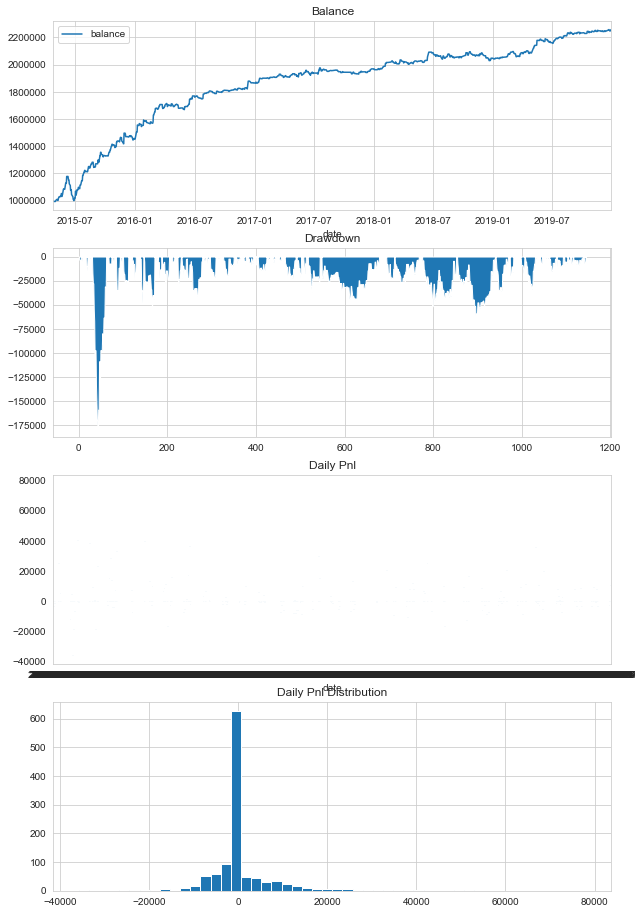

In [5]:
# PPDC 股指IC
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="IC9999.CFFEX",
    interval="1m",
    start=datetime(2015, 1, 1),
    end=datetime(2020, 1, 1),
    rate=0.23/10000,
    slippage=0.6,
    size=200,
    pricetick=0.2,
    capital=1_000_000,
)
engine.add_strategy(TSMyoPPDCPROTOTYPEStrategy, {'trailing_stop': 0.8, 'atr_stop': 7, 'atr_window': 30})
engine.load_data()
engine.run_backtesting()
engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [4]:
# 全样本优化
setting = OptimizationSetting()
setting.set_target("sharpe_ratio")
setting.add_parameter("trailing_stop", 0.4, 0.8, 0.1)
setting.add_parameter("atr_stop", 4, 7, 1)
setting.add_parameter("atr_window", 30, 60, 5)
#setting.add_parameter("limited_size", 4, 8, 4)

op_re = engine.run_optimization(setting)
engine.calc_pbo(op_re, 10)

2020-03-18 00:00:44.930543	参数：{'trailing_stop': 0.7999999999999999, 'atr_stop': 7, 'atr_window': 30}, 目标：1.3607399605857888
2020-03-18 00:00:44.931544	参数：{'trailing_stop': 0.7999999999999999, 'atr_stop': 7, 'atr_window': 35}, 目标：1.3579170376877228
2020-03-18 00:00:44.931544	参数：{'trailing_stop': 0.7999999999999999, 'atr_stop': 7, 'atr_window': 50}, 目标：1.3536459420010938
2020-03-18 00:00:44.931544	参数：{'trailing_stop': 0.7999999999999999, 'atr_stop': 7, 'atr_window': 45}, 目标：1.3521929041735967
2020-03-18 00:00:44.931544	参数：{'trailing_stop': 0.7999999999999999, 'atr_stop': 7, 'atr_window': 40}, 目标：1.3488778862455508
2020-03-18 00:00:44.931544	参数：{'trailing_stop': 0.7999999999999999, 'atr_stop': 7, 'atr_window': 55}, 目标：1.3422710642755158
2020-03-18 00:00:44.931544	参数：{'trailing_stop': 0.7999999999999999, 'atr_stop': 7, 'atr_window': 60}, 目标：1.3311634173694857
2020-03-18 00:00:44.931544	参数：{'trailing_stop': 0.7999999999999999, 'atr_stop': 6, 'atr_window': 30}, 目标：1.3165887858193495
2020-03-

样本内组合为(0, 1, 2, 3, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9857142857142858
样本内组合为(0, 1, 2, 3, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8071428571428572
样本内组合为(0, 1, 2, 3, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.55
样本内组合为(0, 1, 2, 4, 5)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.37142857142857144
样本内组合为(0, 1, 2, 4, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9
样本内组合为(0, 1, 2, 4, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5428571428571428
样本内组合为(0, 1, 2, 4, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5857142857142857
样本内组合为(0, 1, 2, 4, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9571428571428572
样本内组合为(0, 1, 2, 5, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8928571428571429
样本内组合为(0, 1, 2, 5, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.2642857142857143
样本内组合为(0, 1, 2, 5, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.3142857142857143
样本内组合为(0, 1, 2, 5, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9642857142857143
样本内组合为(0, 1, 2, 6, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.7857142857142857
样本内组合为(0, 1, 2, 6, 8)时，样本内最

样本内组合为(0, 4, 6, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.4642857142857143
样本内组合为(0, 4, 6, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9928571428571429
样本内组合为(0, 4, 6, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9928571428571429
样本内组合为(0, 4, 7, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.4714285714285714
样本内组合为(0, 5, 6, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5071428571428571
样本内组合为(0, 5, 6, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9785714285714285
样本内组合为(0, 5, 6, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9
样本内组合为(0, 5, 7, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.4785714285714286
样本内组合为(0, 6, 7, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9785714285714285
样本内组合为(1, 2, 3, 4, 5)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9642857142857143
样本内组合为(1, 2, 3, 4, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.7142857142857143
样本内组合为(1, 2, 3, 4, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9571428571428572
样本内组合为(1, 2, 3, 4, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9642857142857143
样本内组合为(1, 2, 3

样本内组合为(3, 4, 5, 6, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9928571428571429
样本内组合为(3, 4, 5, 6, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9071428571428571
样本内组合为(3, 4, 5, 6, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.7357142857142858
样本内组合为(3, 4, 5, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.37857142857142856
样本内组合为(3, 4, 5, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.35714285714285715
样本内组合为(3, 4, 5, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9642857142857143
样本内组合为(3, 4, 6, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9714285714285714
样本内组合为(3, 4, 6, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.7857142857142857
样本内组合为(3, 4, 6, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.7571428571428571
样本内组合为(3, 4, 7, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.95
样本内组合为(3, 5, 6, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9071428571428571
样本内组合为(3, 5, 6, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8
样本内组合为(3, 5, 6, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.7071428571428572
样本内组合为(3, 5, 7, 8, 9)时，样本内

0.25793650793650796

2020-03-18 00:11:55.253835	开始加载历史数据
2020-03-18 00:11:55.253835	加载进度： [1%]
2020-03-18 00:11:55.253835	加载进度： [2%]
2020-03-18 00:11:55.253835	加载进度： [2%]
2020-03-18 00:11:55.253835	加载进度： [3%]
2020-03-18 00:11:55.253835	加载进度： [4%]
2020-03-18 00:11:55.253835	加载进度： [5%]
2020-03-18 00:11:55.253835	加载进度： [6%]
2020-03-18 00:11:55.253835	加载进度： [7%]
2020-03-18 00:11:55.253835	加载进度： [7%]
2020-03-18 00:11:55.253835	加载进度： [8%]
2020-03-18 00:11:55.253835	加载进度： [9%]
2020-03-18 00:11:55.253835	加载进度： [10%]
2020-03-18 00:11:55.253835	加载进度：# [11%]
2020-03-18 00:11:55.253835	加载进度：# [12%]
2020-03-18 00:11:55.253835	加载进度：# [12%]
2020-03-18 00:11:55.253835	加载进度：# [13%]
2020-03-18 00:11:55.253835	加载进度：# [14%]
2020-03-18 00:11:55.253835	加载进度：# [15%]
2020-03-18 00:11:55.253835	加载进度：# [16%]
2020-03-18 00:11:55.253835	加载进度：# [16%]
2020-03-18 00:11:55.253835	加载进度：# [17%]
2020-03-18 00:11:55.253835	加载进度：# [18%]
2020-03-18 00:11:55.253835	加载进度：# [19%]
2020-03-18 00:11:55.253835	加载进度：# [20%]
2020-03-18 00:11:55.253835	

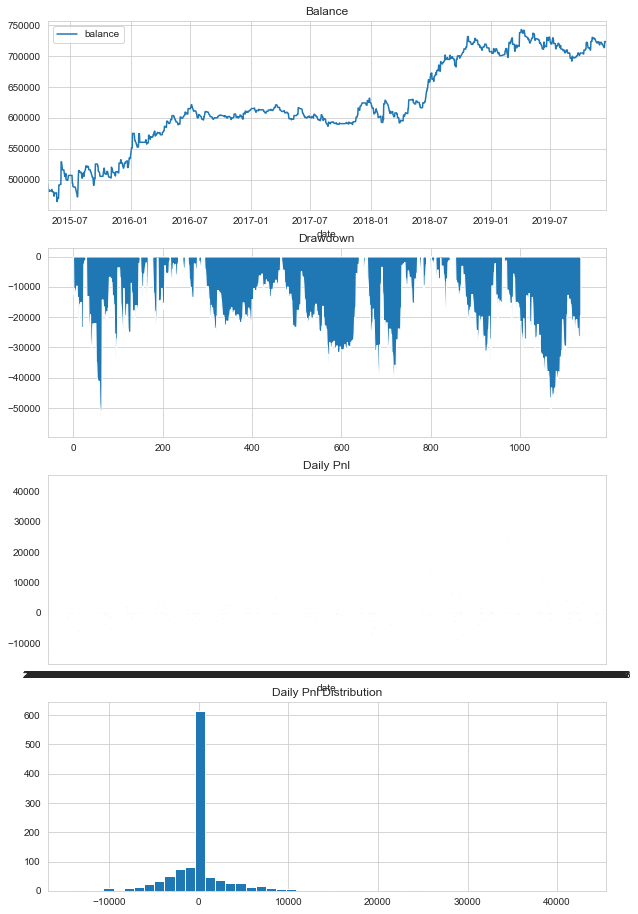

In [10]:
# PPDC IH
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="IH9999.CFFEX",
    interval="1m",
    start=datetime(2010, 1, 1),
    end=datetime(2020, 1, 1),
    rate=0.23/10000,
    slippage=0.6,
    size=300,
    pricetick=0.2,
    capital=500000,
)
engine.add_strategy(TSMyoPPDCPROTOTYPEStrategy, {'trailing_stop': 0.7, 'atr_stop': 6, 'atr_window': 40})
#engine.run_optimization(setting)
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [9]:
# 全样本优化
setting = OptimizationSetting()
setting.set_target("sharpe_ratio")
setting.add_parameter("trailing_stop", 0.4, 0.7, 0.1)
setting.add_parameter("atr_stop", 4, 6, 1)
setting.add_parameter("atr_window", 20, 50, 5)
#setting.add_parameter("limited_size", 4, 8, 4)

op_re = engine.run_optimization(setting)
engine.calc_pbo(op_re, 10)

2020-03-18 00:11:08.910750	参数：{'trailing_stop': 0.7, 'atr_stop': 6, 'atr_window': 40}, 目标：0.35998161564402137
2020-03-18 00:11:08.911754	参数：{'trailing_stop': 0.7, 'atr_stop': 6, 'atr_window': 50}, 目标：0.3479959140965998
2020-03-18 00:11:08.911754	参数：{'trailing_stop': 0.7, 'atr_stop': 6, 'atr_window': 20}, 目标：0.32714436112362344
2020-03-18 00:11:08.911754	参数：{'trailing_stop': 0.7, 'atr_stop': 6, 'atr_window': 35}, 目标：0.32543450141207925
2020-03-18 00:11:08.911754	参数：{'trailing_stop': 0.7, 'atr_stop': 6, 'atr_window': 45}, 目标：0.30995223594948806
2020-03-18 00:11:08.912752	参数：{'trailing_stop': 0.7, 'atr_stop': 6, 'atr_window': 25}, 目标：0.28071911573182046
2020-03-18 00:11:08.912752	参数：{'trailing_stop': 0.7, 'atr_stop': 6, 'atr_window': 30}, 目标：0.2749962048944598
2020-03-18 00:11:08.912752	参数：{'trailing_stop': 0.6, 'atr_stop': 6, 'atr_window': 40}, 目标：0.2633162311542718
2020-03-18 00:11:08.912752	参数：{'trailing_stop': 0.6, 'atr_stop': 6, 'atr_window': 50}, 目标：0.22763318183518386
2020-03-18 00

从总样本内（共10段）取5段数据组成样本内，共有252种取法
样本内组合为(0, 1, 2, 3, 4)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9404761904761905
样本内组合为(0, 1, 2, 3, 5)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9166666666666666
样本内组合为(0, 1, 2, 3, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8690476190476191
样本内组合为(0, 1, 2, 3, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8690476190476191
样本内组合为(0, 1, 2, 3, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8928571428571429
样本内组合为(0, 1, 2, 3, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8571428571428571
样本内组合为(0, 1, 2, 4, 5)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8333333333333334
样本内组合为(0, 1, 2, 4, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8214285714285714
样本内组合为(0, 1, 2, 4, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8690476190476191
样本内组合为(0, 1, 2, 4, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8809523809523809
样本内组合为(0, 1, 2, 4, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8571428571428571
样本内组合为(0, 1, 2, 5, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.7857142857142857
样本内组合为(0, 1, 2, 5, 7)时，样本内最优参数在样本外相对排名 W （0,1

样本内组合为(0, 4, 5, 6, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9880952380952381
样本内组合为(0, 4, 5, 6, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9285714285714286
样本内组合为(0, 4, 5, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(0, 4, 5, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8809523809523809
样本内组合为(0, 4, 5, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(0, 4, 6, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9404761904761905
样本内组合为(0, 4, 6, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9761904761904762
样本内组合为(0, 4, 6, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9880952380952381
样本内组合为(0, 4, 7, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9404761904761905
样本内组合为(0, 5, 6, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9761904761904762
样本内组合为(0, 5, 6, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(0, 5, 6, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9642857142857143
样本内组合为(0, 5, 7, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8809523809523809
样本内组合为(0, 6, 7, 8, 9)时，样本内最优参数在样本外相对排名 W （0,

样本内组合为(2, 4, 5, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5238095238095238
样本内组合为(2, 4, 6, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.7023809523809523
样本内组合为(2, 4, 6, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.7261904761904762
样本内组合为(2, 4, 6, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8333333333333334
样本内组合为(2, 4, 7, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.44047619047619047
样本内组合为(2, 5, 6, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.7261904761904762
样本内组合为(2, 5, 6, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.7738095238095238
样本内组合为(2, 5, 6, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.7619047619047619
样本内组合为(2, 5, 7, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.32142857142857145
样本内组合为(2, 6, 7, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8214285714285714
样本内组合为(3, 4, 5, 6, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.6309523809523809
样本内组合为(3, 4, 5, 6, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.6071428571428571
样本内组合为(3, 4, 5, 6, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.60714285714285

0.05952380952380952

In [ ]:
# PPDC 螺纹
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="RU9999.SHFE",
    interval="1m",
    start=datetime(2010, 1, 1),
    end=datetime(2020, 1, 1),
    rate=1/10000,
    slippage=15,
    size=10,
    pricetick=5,
    capital=500000,
)
engine.add_strategy(TSMyoPPDCPROTOTYPEStrategy, {})
#engine.run_optimization(setting)
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

2020-03-18 00:13:29.965974	开始加载历史数据
2020-03-18 00:13:29.971510	加载进度： [1%]
2020-03-18 00:13:29.972509	加载进度： [2%]
2020-03-18 00:13:29.974511	加载进度： [2%]
2020-03-18 00:13:29.975512	加载进度： [3%]
2020-03-18 00:13:29.976514	加载进度： [4%]
2020-03-18 00:13:29.976514	加载进度： [5%]
2020-03-18 00:13:29.977515	加载进度： [6%]
2020-03-18 00:13:29.978514	加载进度： [7%]
2020-03-18 00:13:29.979516	加载进度： [7%]
2020-03-18 00:13:29.980517	加载进度： [8%]
2020-03-18 00:13:29.981518	加载进度： [9%]
2020-03-18 00:13:29.982518	加载进度： [10%]
2020-03-18 00:13:29.983519	加载进度：# [11%]
2020-03-18 00:13:29.984520	加载进度：# [12%]
2020-03-18 00:13:29.985521	加载进度：# [12%]
2020-03-18 00:13:29.986522	加载进度：# [13%]
2020-03-18 00:13:29.986522	加载进度：# [14%]
2020-03-18 00:13:29.987523	加载进度：# [15%]
2020-03-18 00:13:29.988524	加载进度：# [16%]
2020-03-18 00:13:29.989524	加载进度：# [16%]
2020-03-18 00:13:29.990525	加载进度：# [17%]
2020-03-18 00:13:29.991526	加载进度：# [18%]
2020-03-18 00:13:29.992527	加载进度：# [19%]
2020-03-18 00:13:29.992527	加载进度：# [20%]
2020-03-18 00:13:29.993528	

In [15]:
# 全样本优化
setting = OptimizationSetting()
setting.set_target("sharpe_ratio")
setting.add_parameter("trailing_stop", 1.8, 2.2, 0.2)
setting.add_parameter("atr_stop", 6,12 , 3)
setting.add_parameter("atr_window", 30, 50, 5)
#setting.add_parameter("limited_size", 4, 8, 4)

op_re = engine.run_optimization(setting)
engine.calc_pbo(op_re, 10)

2020-03-15 21:33:49.042327	参数：{'trailing_stop': 2.2, 'atr_stop': 12, 'atr_window': 50}, 目标：-2.4658091168432947
2020-03-15 21:33:49.042327	参数：{'trailing_stop': 2.2, 'atr_stop': 12, 'atr_window': 45}, 目标：-2.4705092530775064
2020-03-15 21:33:49.042327	参数：{'trailing_stop': 2.2, 'atr_stop': 12, 'atr_window': 35}, 目标：-2.4776581676497043
2020-03-15 21:33:49.042327	参数：{'trailing_stop': 2.2, 'atr_stop': 12, 'atr_window': 30}, 目标：-2.481952067940646
2020-03-15 21:33:49.042327	参数：{'trailing_stop': 2.0, 'atr_stop': 12, 'atr_window': 50}, 目标：-2.4938056033937333
2020-03-15 21:33:49.042327	参数：{'trailing_stop': 2.0, 'atr_stop': 12, 'atr_window': 45}, 目标：-2.4956983661276095
2020-03-15 21:33:49.042327	参数：{'trailing_stop': 2.0, 'atr_stop': 12, 'atr_window': 35}, 目标：-2.5078045797501343
2020-03-15 21:33:49.042327	参数：{'trailing_stop': 2.0, 'atr_stop': 12, 'atr_window': 30}, 目标：-2.511179009193472
2020-03-15 21:33:49.042327	参数：{'trailing_stop': 2.2, 'atr_stop': 9, 'atr_window': 40}, 目标：-2.5124948682024515
2020

样本内组合为(0, 1, 5, 6, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5111111111111111
样本内组合为(0, 1, 5, 6, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5111111111111111
样本内组合为(0, 1, 5, 6, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5333333333333333
样本内组合为(0, 1, 5, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.4888888888888889
样本内组合为(0, 1, 5, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.6666666666666666
样本内组合为(0, 1, 5, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5777777777777777
样本内组合为(0, 1, 6, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.6222222222222222
样本内组合为(0, 1, 6, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.4666666666666667
样本内组合为(0, 1, 6, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.4444444444444444
样本内组合为(0, 1, 7, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5555555555555556
样本内组合为(0, 2, 3, 4, 5)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5111111111111111
样本内组合为(0, 2, 3, 4, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.4888888888888889
样本内组合为(0, 2, 3, 4, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.6222222222222222

样本内组合为(1, 2, 5, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5555555555555556
样本内组合为(1, 2, 5, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5333333333333333
样本内组合为(1, 2, 6, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.37777777777777777
样本内组合为(1, 2, 6, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.4
样本内组合为(1, 2, 6, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.4
样本内组合为(1, 2, 7, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.4
样本内组合为(1, 3, 4, 5, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.6222222222222222
样本内组合为(1, 3, 4, 5, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5777777777777777
样本内组合为(1, 3, 4, 5, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.6
样本内组合为(1, 3, 4, 5, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.6666666666666666
样本内组合为(1, 3, 4, 6, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5777777777777777
样本内组合为(1, 3, 4, 6, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.6
样本内组合为(1, 3, 4, 6, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.35555555555555557
样本内组合为(1, 3, 4, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.688888888888

0.3531746031746032

2020-03-16 09:53:36.456522	开始加载历史数据
2020-03-16 09:53:36.456522	加载进度： [1%]
2020-03-16 09:53:36.456522	加载进度： [2%]
2020-03-16 09:53:36.456522	加载进度： [2%]
2020-03-16 09:53:36.456522	加载进度： [3%]
2020-03-16 09:53:36.456522	加载进度： [4%]
2020-03-16 09:53:36.456522	加载进度： [5%]
2020-03-16 09:53:36.456522	加载进度： [6%]
2020-03-16 09:53:36.456522	加载进度： [7%]
2020-03-16 09:53:36.456522	加载进度： [7%]
2020-03-16 09:53:36.456522	加载进度： [8%]
2020-03-16 09:53:36.456522	加载进度： [9%]
2020-03-16 09:53:36.456522	加载进度： [10%]
2020-03-16 09:53:36.472150	加载进度：# [11%]
2020-03-16 09:53:36.472150	加载进度：# [12%]
2020-03-16 09:53:36.472150	加载进度：# [12%]
2020-03-16 09:53:36.472150	加载进度：# [13%]
2020-03-16 09:53:36.472150	加载进度：# [14%]
2020-03-16 09:53:36.472150	加载进度：# [15%]
2020-03-16 09:53:36.472150	加载进度：# [16%]
2020-03-16 09:53:36.472150	加载进度：# [16%]
2020-03-16 09:53:36.472150	加载进度：# [17%]
2020-03-16 09:53:36.472150	加载进度：# [18%]
2020-03-16 09:53:36.472150	加载进度：# [19%]
2020-03-16 09:53:36.472150	加载进度：# [20%]
2020-03-16 09:53:36.472150	

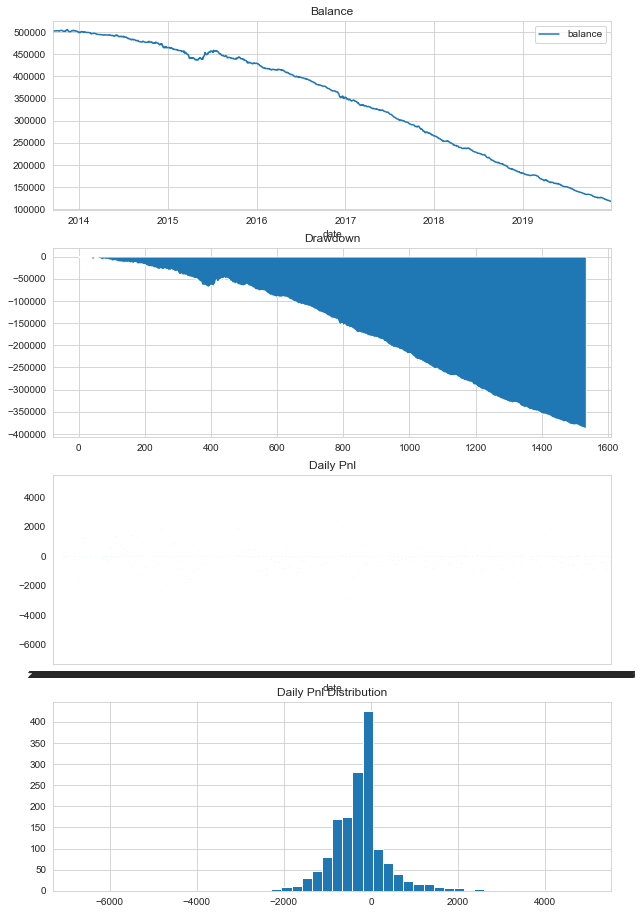

In [16]:
# PPDC 五债
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="TF9999.CFFEX",
    interval="1m",
    start=datetime(2010, 1, 1),
    end=datetime(2020, 1, 1),
    rate=3/1000000,
    slippage=0.005,
    size=10000,
    pricetick=0.005,
    capital=500000,
)
engine.add_strategy(TSMyoPPDCPROTOTYPEStrategy, {'trailing_stop': 0.7})
#engine.run_optimization(setting)
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [17]:
# 全样本优化
setting = OptimizationSetting()
setting.set_target("sharpe_ratio")
setting.add_parameter("trailing_stop", 1.8, 2.2, 0.2)
setting.add_parameter("atr_stop", 6,12 , 3)
setting.add_parameter("atr_window", 30, 50, 5)
#setting.add_parameter("limited_size", 4, 8, 4)

op_re = engine.run_optimization(setting)
engine.calc_pbo(op_re, 10)

2020-03-17 21:58:48.084770	参数：{'trailing_stop': 1.8, 'atr_stop': 12, 'atr_window': 45}, 目标：-2.5875909444776544
2020-03-17 21:58:48.084770	参数：{'trailing_stop': 2.0, 'atr_stop': 12, 'atr_window': 45}, 目标：-2.5875909444776544
2020-03-17 21:58:48.084770	参数：{'trailing_stop': 2.2, 'atr_stop': 12, 'atr_window': 45}, 目标：-2.5875909444776544
2020-03-17 21:58:48.084770	参数：{'trailing_stop': 1.8, 'atr_stop': 12, 'atr_window': 50}, 目标：-2.6058455033102885
2020-03-17 21:58:48.084770	参数：{'trailing_stop': 2.0, 'atr_stop': 12, 'atr_window': 50}, 目标：-2.6058455033102885
2020-03-17 21:58:48.084770	参数：{'trailing_stop': 2.2, 'atr_stop': 12, 'atr_window': 50}, 目标：-2.6058455033102885
2020-03-17 21:58:48.084770	参数：{'trailing_stop': 1.8, 'atr_stop': 12, 'atr_window': 40}, 目标：-2.6453552553195783
2020-03-17 21:58:48.084770	参数：{'trailing_stop': 2.0, 'atr_stop': 12, 'atr_window': 40}, 目标：-2.6453552553195783
2020-03-17 21:58:48.084770	参数：{'trailing_stop': 2.2, 'atr_stop': 12, 'atr_window': 40}, 目标：-2.6453552553195783
2

样本内组合为(0, 1, 5, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.7333333333333333
样本内组合为(0, 1, 5, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8
样本内组合为(0, 1, 6, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(0, 1, 6, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.7333333333333333
样本内组合为(0, 1, 6, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(0, 1, 7, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(0, 2, 3, 4, 5)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.7333333333333333
样本内组合为(0, 2, 3, 4, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9333333333333333
样本内组合为(0, 2, 3, 4, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9333333333333333
样本内组合为(0, 2, 3, 4, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8
样本内组合为(0, 2, 3, 4, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8666666666666667
样本内组合为(0, 2, 3, 5, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(0, 2, 3, 5, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(0, 2, 3, 5, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8
样本内组合为(0, 2, 3, 5, 9)时，样本内最优参数在样本外相对排名 W （

样本内组合为(1, 3, 4, 5, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8666666666666667
样本内组合为(1, 3, 4, 6, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(1, 3, 4, 6, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9333333333333333
样本内组合为(1, 3, 4, 6, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(1, 3, 4, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(1, 3, 4, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(1, 3, 4, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9333333333333333
样本内组合为(1, 3, 5, 6, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.7333333333333333
样本内组合为(1, 3, 5, 6, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(1, 3, 5, 6, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(1, 3, 5, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(1, 3, 5, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.7333333333333333
样本内组合为(1, 3, 5, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：1.0
样本内组合为(1, 3, 6, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9333333333333333
样本内组合为(1, 3, 6, 7, 9)时，样本内最优参数在样本外相对排名 W （

0.0